### checking overall stats

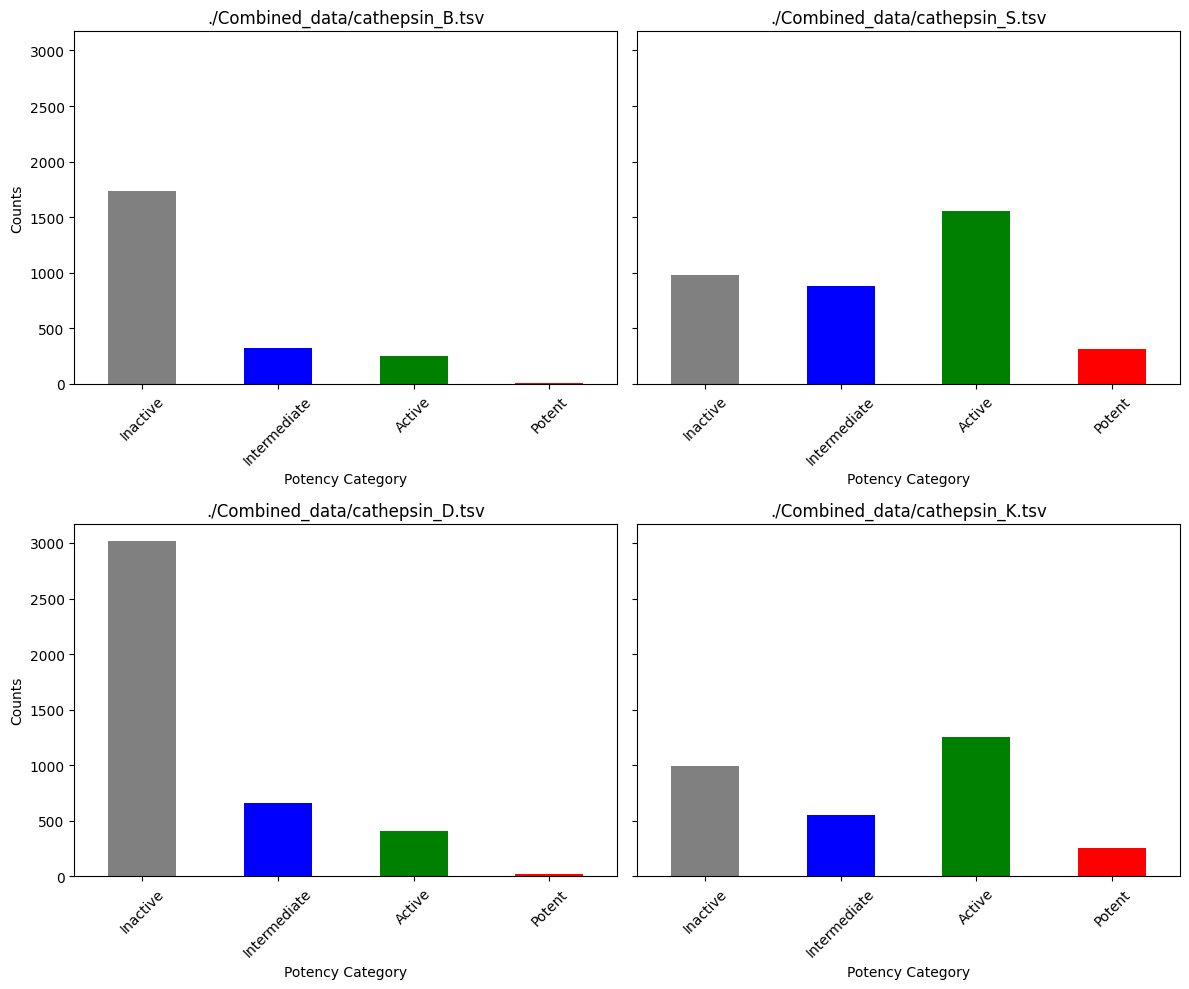

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File names and importance categories
file_names = ['./Combined_data/cathepsin_B.tsv', './Combined_data/cathepsin_S.tsv', './Combined_data/cathepsin_D.tsv', './Combined_data/cathepsin_K.tsv']
importance = {0: 'Inactive', 1: 'Intermediate', 2: 'Active', 3: 'Potent'}

# Initialize a dictionary to store counts for each file
all_counts = {}

# Process each file
for file in file_names:
    if os.path.exists(file):
        # Read the TSV file
        data = pd.read_csv(file, sep='\t')

        # Count the occurrences of each potency value
        counts = data['Potency'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

        # Map the potency values to their importance
        counts.index = counts.index.map(importance)

        # Store the counts for the file
        all_counts[file] = counts
    else:
        print(f"File not found: {file}")

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()

for i, (file, counts) in enumerate(all_counts.items()):
    ax = axes[i]
    counts.plot(kind='bar', ax=ax, color=['gray', 'blue', 'green', 'red'])
    ax.set_title(file)
    ax.set_xlabel('Potency Category')
    ax.set_ylabel('Counts')
    ax.set_xticklabels(counts.index, rotation=45)

plt.tight_layout()
plt.show()
